# Notas Quiz
***

In [4]:
import numpy as np # matematica
import pandas as pd # DataFrame
import matplotlib.pyplot as plt # plot
import seaborn as sns  #plot pero diferente
from scipy.stats import t # estadistica prueba t
from scipy.stats import norm # estadistica prueba normal
import statsmodels.api as sm # para hacer la regresion lineal
from scipy.stats import jarque_bera # probar la validez del modelo
from statsmodels.api import qqplot # probar la validez del modelo

In [5]:
dataStr= '1.0 10 0.8 80 0.9 160 1.3 230 1.8 280 2.5 370 2.8 430 0.9 10 0.6 80 1.1 160 1.6 230 2.1 290 2.9 370 3.3 430 0.8 10 1.8 80 1.7 160 2.8 230 1.9 290 2.6 370 2.5 440 1.3 20 1.0 90 2.0 160 2.2 230 2.4 300 2.3 350 2.8 440 0.9 20 2.0 100 1.6 170 2.6 230 2.5 300 2.7 350 2.4 450 0.6 30 1.5 100 1.9 170 1.4 240 2.9 300 2.8 360 2.6 450 1.1 30 1.3 110 1.7 170 1.6 240 2.0 300 3.1 360 3.0 450 1.0 30 1.7 110 2.2 180 1.7 240 1.9 310 3.0 380 3.4 460 1.4 40 0.5 100 2.4 180 1.5 250 2.5 310 3.2 380 3.0 460 1.4 40 1.2 110 1.6 180 2.2 250 2.6 310 2.9 390 3.3 470 1.2 40 0.8 110 2.0 190 2.5 250 3.2 320 2.6 390 3.4 470 1.7 50 1.0 120 1.5 200 2.4 260 2.8 320 2.5 390 3.1 470 0.9 50 1.8 120 2.1 200 2.0 260 2.4 320 2.7 400 3.6 480 1.2 50 2.1 120 1.8 190 2.7 260 2.5 320 3.1 400 3.0 480 1.3 50 1.5 130 4.1 190 2.0 270 2.0 330 2.4 400 2.9 480 0.7 60 1.9 130 2.5 200 2.8 290 2.4 340 3.0 400 3.2 480 1.0 60 1.7 140 1.7 220 2.2 290 2.2 340 3.4 420 2.6 490 1.3 70 1.2 150 2.0 220 2.4 290 2.0 340 3.5 420 3.8 490 1.5 70 1.4 150 2.3 220 2.2 270 2.5 350 3.1 420 3.3 490 2.0 70 2.1 150 1.8 220 2.4 270 2.8 350 2.9 420 2.9 500'
NombreColX= 'x'
NombreColY = 'y'
dataA = dataStr.split()
x = []
y = []

for i in range (0,len(dataA)):
    if (i%2 == 1):
        x.append(float(dataA[i]))
    else:
        y.append(float(dataA[i]))
data = pd.DataFrame(columns=[NombreColX, NombreColY])
data[NombreColX] = x
data[NombreColY] = y

data.head()

,x,y
0,10.0,1.0
1,80.0,0.8
2,160.0,0.9
3,230.0,1.3
4,280.0,1.8


In [6]:
NombreColX= 'Gasto'
NombreColY = 'Ventas'
#dataA = dataStr.split()
x = [41, 54, 63, 54, 48, 46, 62, 61, 64, 71]
y = [1250, 1380, 1425, 1425, 1450, 1300, 1400, 1510, 1575, 1650]

data = pd.DataFrame(columns=[NombreColX, NombreColY])
data[NombreColX] = x
data[NombreColY] = y
data.head()

,Gasto,Ventas
0,41,1250
1,54,1380
2,63,1425
3,54,1425
4,48,1450


#### Paso 1: Eliminar los datos vacios

In [7]:
print(data.isnull().sum())

Gasto     0
Ventas    0
dtype: int64


In [8]:

data = data [[NombreColX,NombreColY]].dropna() #escogemos las columnas indicadas y botamos datos vacios
#data.columns = ['Esp. vida', 'Escolaridad'] #renombramos las columnas 
data.reset_index(inplace=True,drop=True) #establecemos unos nuevos índices 
data.head()

,Gasto,Ventas
0,41,1250
1,54,1380
2,63,1425
3,54,1425
4,48,1450


#### Paso 2: Definir y ajustar el modelo de regresion a los datos

In [9]:
data = sm.add_constant(data) # se agrega la cte a el DataFrame
regre_simple = sm.OLS(data[NombreColY],data[['const',NombreColX]]) #Definimos el modelo de regresión 
result_simple = regre_simple.fit()  #Ajustamos el modelo a los datos 
result_simple.params  #usando el atributo params podemos imprimir los parámetros óptimos 
m = result_simple.params[1]
b = result_simple.params[0]

#### Paso 3: Plot

<Figure size 432x288 with 0 Axes>

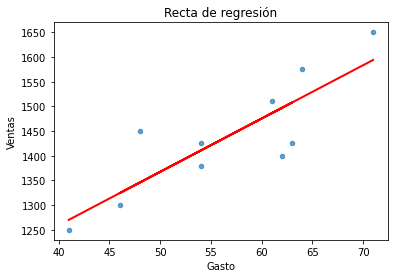

In [10]:
#plot con matplotlib
plt.figure()
data.plot.scatter(x= NombreColX,y= NombreColY,alpha=0.7)
plt.plot(data[NombreColX],b + m*data[NombreColX],color='r',lw=2)
plt.title('Recta de regresión')
plt.show()


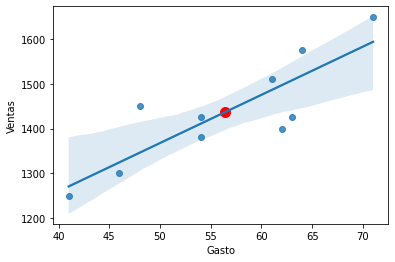

In [11]:
# plot con sns
from turtle import color
sns.regplot(x=NombreColX, y = NombreColY, data = data)
plt.scatter(data[NombreColX].mean(), data[NombreColY].mean(), color = 'r',s=100)

#### Paso 4: Sacar los estadisticos

In [12]:
result_simple.summary()


c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     20.47
Date:                Thu, 18 Aug 2022   Prob (F-statistic):            0.00194
Time:                        10:58:19   Log-Likelihood:                -55.150
No. Observations:                  10   AIC:                             114.3
Df Residuals:                       8   BIC:                             114.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        828.1269    136.129      6.083      0.000     514.214    1142.040
Gasto         10.7868      2.384      4.525      0.002       5.289      16.284
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.336
Skew:                          -0.012   Prob(JB):                        0.845
Kurtosis:                       2.102   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Intervalos de confianza con alpha diferente de 0.05
alpha = 0.05
result_simple.conf_int(alpha)

,0,1
const,514.213779,1142.039998
Gasto,5.289146,16.284368


Coeficiente de determinacion
<br>
- Porcentaje de variacion de $Y$ que es explicado por la variacion de $X$
- Se denota como $R^2$

In [14]:
result_simple.rsquared

0.719019259160206

Coeficiente de Correlacion:
<br>
$$ r = \sqrt R^2 $$
<br>
si r :<br>
0-0.5 -> debil <br>
0.5 - 0.8 -> moderado <br>
0.8 - 1 -> Fuerte

In [15]:
np.sqrt(result_simple.rsquared)

0.8479500334101097

Recta de regresion ajustada:
<br>
- Representa la recta de la regresion

In [16]:
result_simple.params
print(NombreColY, " = ", m, "x + ", b ) # variables m y b ya se habian declarado previamente

Ventas  =  10.786757301107777 x +  828.1268882175214


Estimar el error estandar de $\hat{\beta_1}$
<br>
$$ \frac {s}{\sqrt S_{xx}}

In [17]:
s = np.sqrt(result_simple.mse_resid)
xBarra = data[NombreColX].mean()
Sxx = np.sum((data[NombreColX] - xBarra)**2)
eB1 = s/np.sqrt(Sxx)
print(eB1)
# tambien se puede encontrar en el summary pero este es mas exacto

2.384042146440731


Estimar el error estandar de $ \hat{\beta _0}$
<br>
$$s\sqrt{\frac{1}{n} + \frac{\bar{x}}{S_{xx}}} $$

In [18]:
s = np.sqrt(result_simple.mse_resid)
xBarra = data[NombreColX].mean()
n = len(data)
Sxx = np.sum((data[NombreColX] - xBarra)**2)
eB0 = s*np.sqrt((1/n) + (xBarra/Sxx))
print(eB0)

27.786110935210388


Calcular una estimacion puntual
<br>
$$\hat y \pm t_{a/2} * \sigma^2  *\sqrt{1+ \frac{1}{n} + \frac{x - \bar x}{S_{xx}}}%%

In [19]:
xPronostico = 13.6
alpha = 0.05
gradosLib = len(data) -2
t1 = t(gradosLib)
yGorro = result_simple.params[0] + result_simple.params[1]*xPronostico
t_alpha = t1.ppf(1-(alpha/2))
stdDiv = np.sqrt(result_simple.mse_resid)
xBarra = data[NombreColX].mean()

Sxx = np.sum((data[NombreColX] - xBarra)**2)

print(yGorro - t_alpha*stdDiv*np.sqrt(1+ (1/len(data)) + ((xPronostico - xBarra)**2)/Sxx), ',',yGorro + t_alpha*stdDiv*np.sqrt(1+ (1/len(data)) + ((xPronostico - xBarra)**2)/Sxx))


688.8622192544178 , 1260.7913557707564


Calcular una estimacion General
<br>
$$\hat y \pm t_{a/2} * \hat \sigma * \sqrt{\frac{1}{n} + \frac{(\hat x - \bar x)^2}{S_{xx}}}$$

In [20]:
xPronostico = 9.5
alpha = 0.05
gradosLib = len(data) -2
t1 = t(gradosLib)
yGorro = result_simple.params[0] + result_simple.params[1]*xPronostico
t_alpha = t1.ppf(1-(alpha/2))
stdDiv = np.sqrt(result_simple.mse_resid)
xBarra = data[NombreColX].mean()

Sxx = np.sum((data[NombreColX] - xBarra)**2)

print(yGorro - t_alpha*stdDiv*np.sqrt((1/len(data)) + ((xPronostico - xBarra)**2)/Sxx), ',',yGorro + t_alpha*stdDiv*np.sqrt((1/len(data)) + ((xPronostico - xBarra)**2)/Sxx))


668.1484477088615 , 1193.0537174472288


Validación del modelo 

Entre las hipótesis que hemos considerado para el modelo se encuentran 

- la relación entre $Y$ y $X$ es lineal 
- el error tiene media 0
- el error tiene varianza constante
- los errores no están correlacionados
- los errores se distribuyen de forma normal.

La útlima de estas hipótesis fue fundamental en las pruebas de hipótesis y construcción de los intervalos de confianza para los parámetros. 

In [21]:
# Primer Criterio
np.sqrt(result_simple.rsquared)
# debe de mostrar una relacion fuerte de linealidad

0.8479500334101097

In [22]:
# Segundo Criterio
np.mean(result_simple.resid) # media 0

0.0

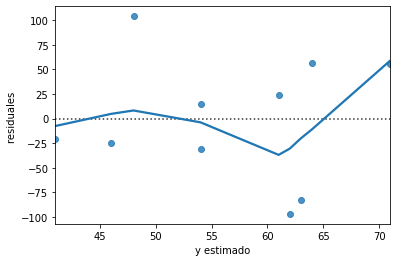

In [23]:
# Tercer Criterio
sns.residplot(x= NombreColX, y= NombreColY, data=data,lowess=True)
plt.xlabel("y estimado")
plt.ylabel("residuales ")
plt.show()
# tiene que ser parecido a una linea recta

In [24]:
# Tercer Criterio - Numerico
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result_simple.resid,  result_simple.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 0.522145630576073, 'Test Statistic p-value': 0.770224833430039, 'F-Statistic': 0.19281892670897113, 'F-Test p-value': 0.8288674969755916}


In [25]:
# Cuarto Criterio - debe de dar entre (1.5, 2.5)
import statsmodels.stats.stattools as sttools
durbinwatson=sttools.durbin_watson(result_simple.resid)
print(durbinwatson)

1.597665748873168


In [26]:
# Quinto Criterio - Distribucion Normal de errores
result_simple.summary()
# Ver Valor P Jarque Bera
# Prob(JB)

c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     20.47
Date:                Thu, 18 Aug 2022   Prob (F-statistic):            0.00194
Time:                        10:58:22   Log-Likelihood:                -55.150
No. Observations:                  10   AIC:                             114.3
Df Residuals:                       8   BIC:                             114.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        828.1269    136.129      6.083      0.000     514.214    1142.040
Gasto         10.7868      2.384      4.525      0.002       5.289      16.284
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.336
Skew:                          -0.012   Prob(JB):                        0.845
Kurtosis:                       2.102   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""